In [20]:
 source('functions.R')
source('figure_parameters.R')
seurat = readRDS('Data/tissue_seurat.RDS')

Warning message:
"package 'ggpubr' was built under R version 3.5.3"Loading required package: magrittr

Attaching package: 'magrittr'

The following object is masked from 'package:tidyr':

    extract


Attaching package: 'ggpubr'

The following object is masked from 'package:cowplot':

    get_legend



Regressing out: n_genes



Time Elapsed:  31.2506151199341 secs

Scaling data matrix


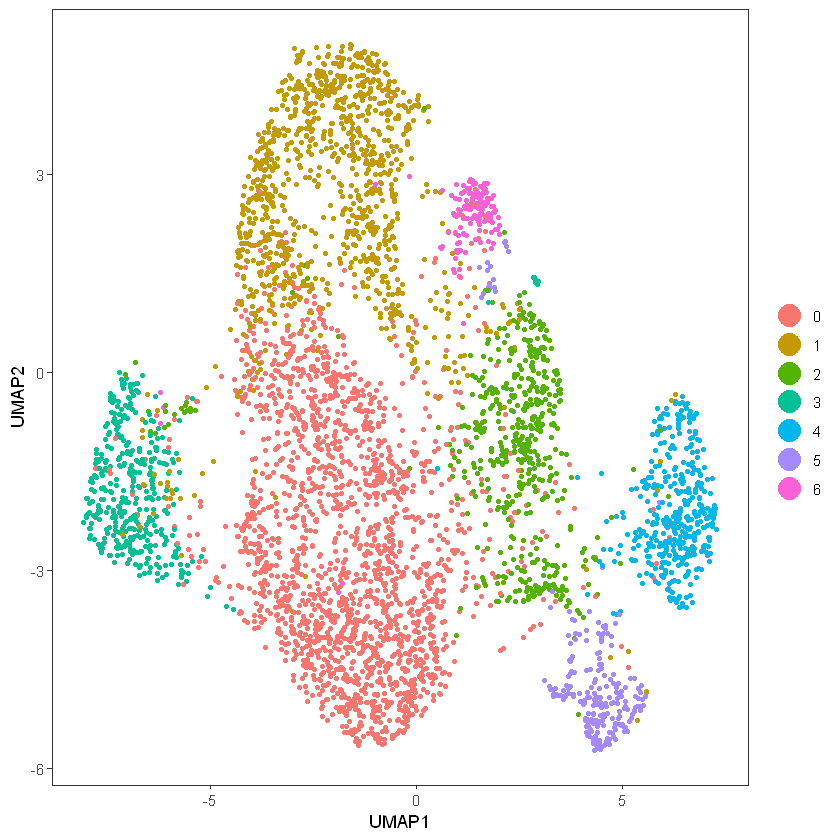

In [23]:
tcell = SubsetData(seurat, seurat@cell.names[seurat@meta.data$phenotype == 'T cell' & seurat@meta.data$tissue == 'Esophagus'])
tcell = seuratProcess(tcell)
tcell = RunUMAP(tcell, dims.use = 1:10)
tcell = FindClusters(tcell, dims.use = 1:10, resolution = .3, print.output = FALSE, force.recalc = TRUE)
DimPlot(tcell, 'umap')

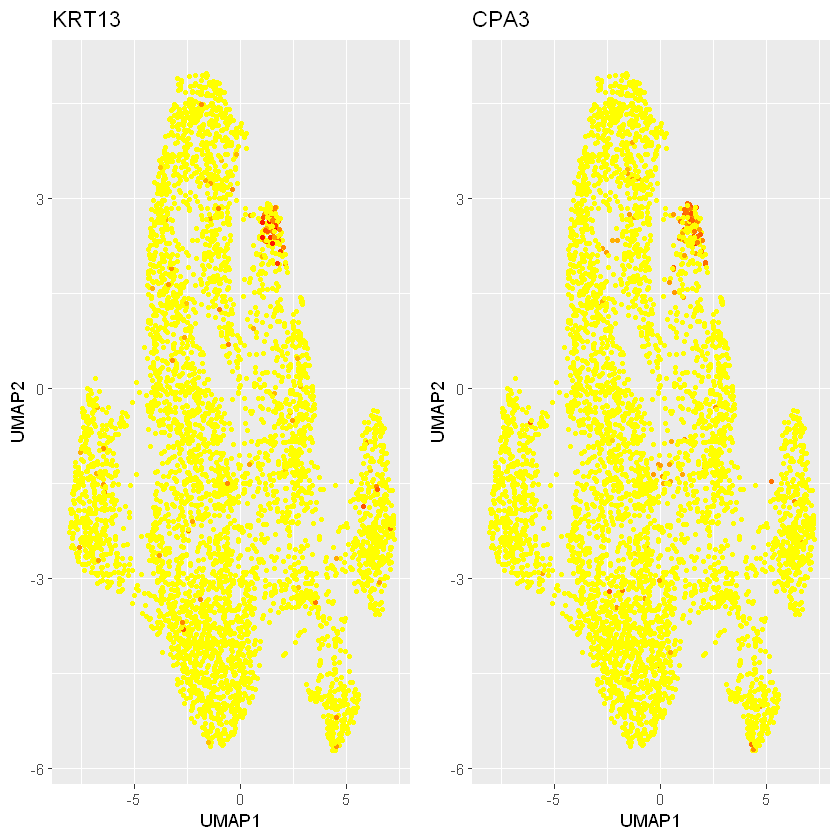

In [24]:
FeaturePlot(tcell, c("KRT13", 'CPA3'), reduction.use = 'umap')

Regressing out: n_genes



Time Elapsed:  34.7588460445404 secs

Scaling data matrix


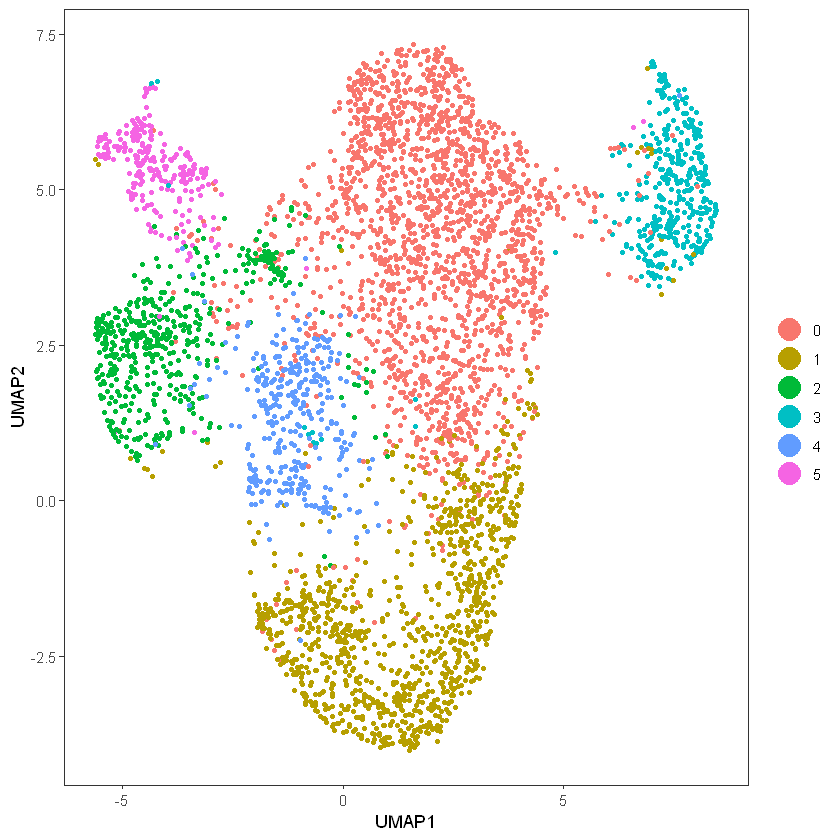

In [25]:
# cluster 6 contains cells that express high levels of transcripts associated with mast cells and epithelial cells
# these cells are doublets and should be removed from analysis
tcell1 = SubsetData(tcell, tcell@cell.names[tcell@ident != 6])
tcell1 = seuratProcess(tcell1)
tcell1 = RunUMAP(tcell1, dims.use = 1:10)
tcell1 = FindClusters(tcell1, dims.use = 1:10, resolution = .3, print.output = FALSE, force.recalc = TRUE)
DimPlot(tcell1, 'umap')

# map from Louvain cluster to E1-E6
tcell@meta.data$plot_cluster = 0
tcell@meta.data$plot_cluster[tcell@meta.data$res.0.3 == 0] = 'E1'
tcell@meta.data$plot_cluster[tcell@meta.data$res.0.3 == 1] = 'E2'
tcell@meta.data$plot_cluster[tcell@meta.data$res.0.3 == 2] = 'E3'
tcell@meta.data$plot_cluster[tcell@meta.data$res.0.3 == 3] = 'E4'
tcell@meta.data$plot_cluster[tcell@meta.data$res.0.3 == 4] = 'E5'
tcell@meta.data$plot_cluster[tcell@meta.data$res.0.3 == 5] = 'E6'

Regressing out: n_genes



Time Elapsed:  28.6665110588074 secs

Scaling data matrix


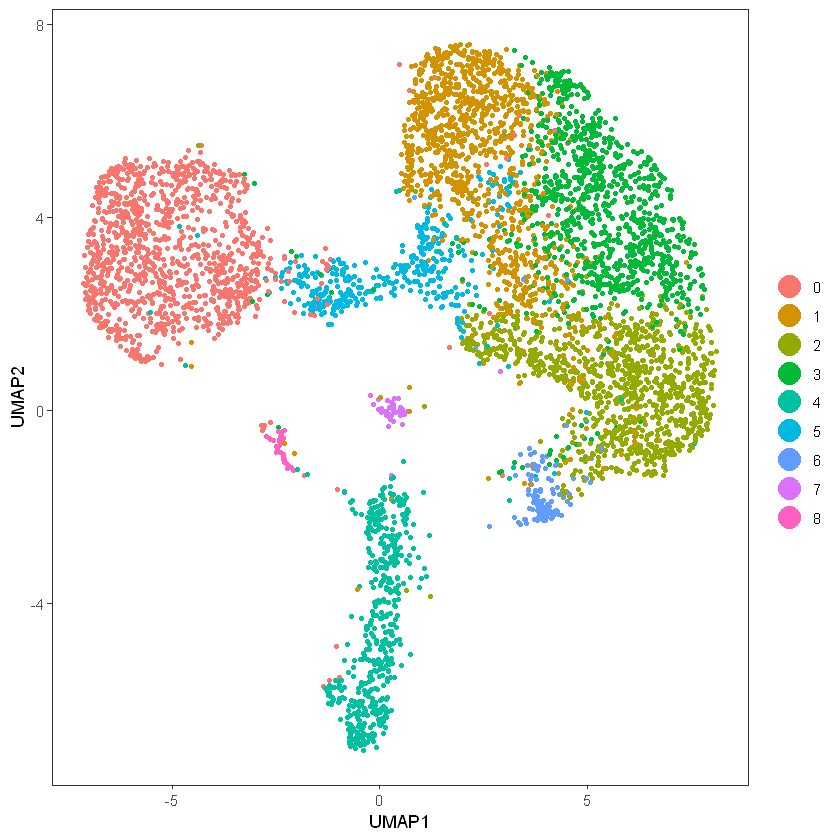

In [30]:
# process duodenal T cells
tcelld = SubsetData(seurat, seurat@cell.names[seurat@meta.data$phenotype == 'T cell' & seurat@meta.data$tissue == 'Duodenum'])
tcelld = seuratProcess(tcelld)
tcelld = RunUMAP(tcelld, dims.use = 1:10)
tcelld = FindClusters(tcelld, dims.use = 1:10, resolution = .3, print.output = FALSE, force.recalc = TRUE)
DimPlot(tcelld, 'umap')



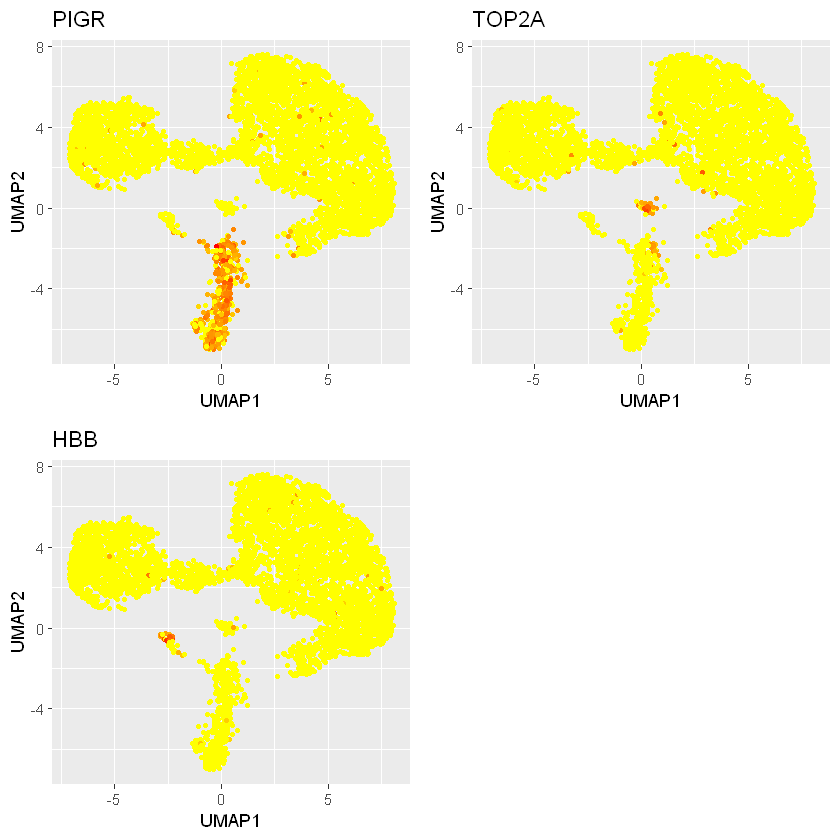

In [31]:
# clusters 4 and 8 contain high levels of transcripts associated with the duodenal epithelium and RBCs
FeaturePlot(tcelld, c("PIGR", 'TOP2A', 'HBB'), reduction.use = 'umap')

Regressing out: n_genes



Time Elapsed:  26.9584920406342 secs

Scaling data matrix


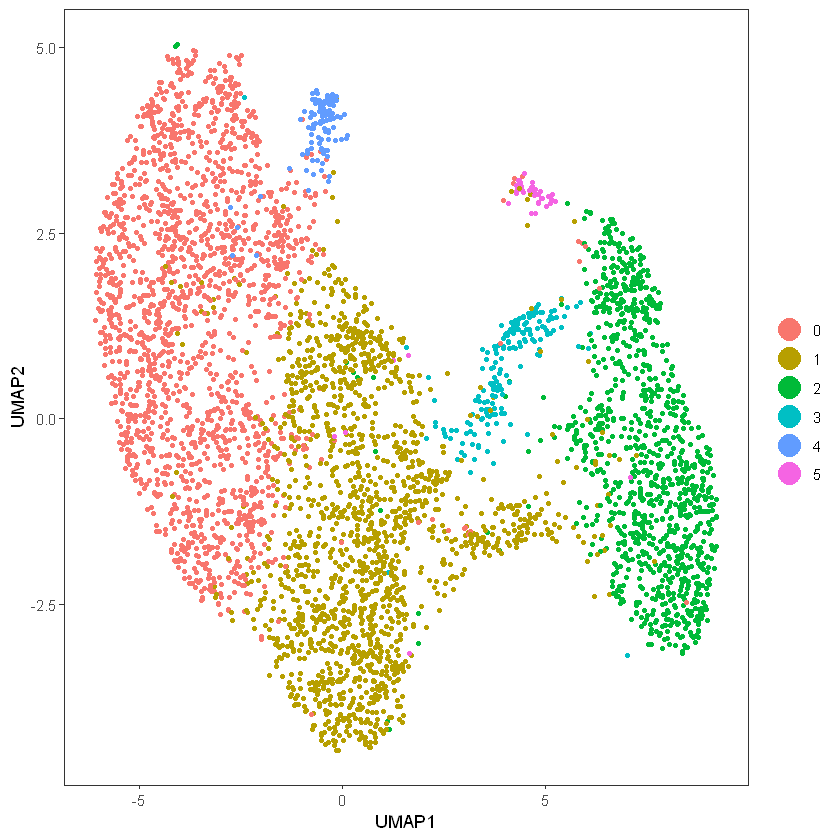

In [32]:
tcelld1 = SubsetData(tcelld, tcelld@cell.names[!tcelld@ident %in% c(4,8)])
tcelld1 = pyProcess(tcelld1)
tcelld1 = RunUMAP(tcelld1, dims.use = 1:10)
tcelld1 = FindClusters(tcelld1, dims.use = 1:10, resolution = .3, print.output = FALSE, force.recalc = TRUE)


tcelld@meta.data$plot_cluster = 0
tcelld@meta.data$plot_cluster[tcelld@meta.data$res.0.3 == 0] = 'D1'
tcelld@meta.data$plot_cluster[tcelld@meta.data$res.0.3 == 1] = 'D2'
tcelld@meta.data$plot_cluster[tcelld@meta.data$res.0.3 == 2] = 'D3'
tcelld@meta.data$plot_cluster[tcelld@meta.data$res.0.3 == 3] = 'D4'
tcelld@meta.data$plot_cluster[tcelld@meta.data$res.0.3 == 4] = 'D5'
tcelld@meta.data$plot_cluster[tcelld@meta.data$res.0.3 == 5] = 'D6'
DimPlot(tcelld1, 'umap')

Regressing out: n_genes



Time Elapsed:  33.8447980880737 secs

Scaling data matrix


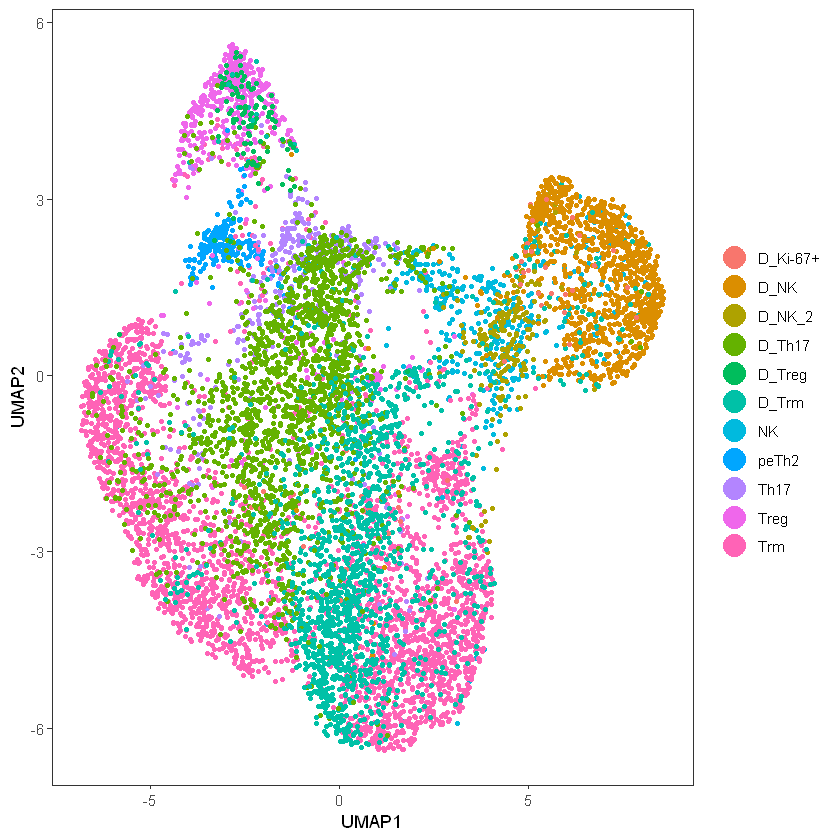

In [37]:
# process both T cells from both tissues together
tcells = MergeSeurat(tcell1, tcelld1)
tcells = seuratProcess(tcells)
tcells = RunUMAP(tcells, dims.use = 1:10)
DimPlot(tcells, 'umap', group.by = 'pheno')

In [71]:
# write barcodes for TCR analysis
bcs = c(tcell1@meta.data$bcs, tcelld1@meta.data$bcs)
write.csv(bcs,'../PipeLineInputFiles/tcellbarcodes.txt' , row.names = FALSE,  quote = FALSE)

In [109]:
saveRDS(tcells, '../Data/tcell_both.RDS')

In [92]:
saveRDS(tcell1, '../Data/tcell_e.RDS')
saveRDS(tcelld1, '../Data/tcell_d.RDS')